In [1]:
back_test = get_backtest('5ee56de7a8ef3a4985e11e43')

100% Time:  0:00:02|##########################################################|


In [2]:
back_test.benchmark_security

8554

In [5]:
back_test.recorded_vars['Leverage'].plot()

In [ ]:
leveraged_back_test = get_backtest('5ee5705bd638ad46f347ceb6')

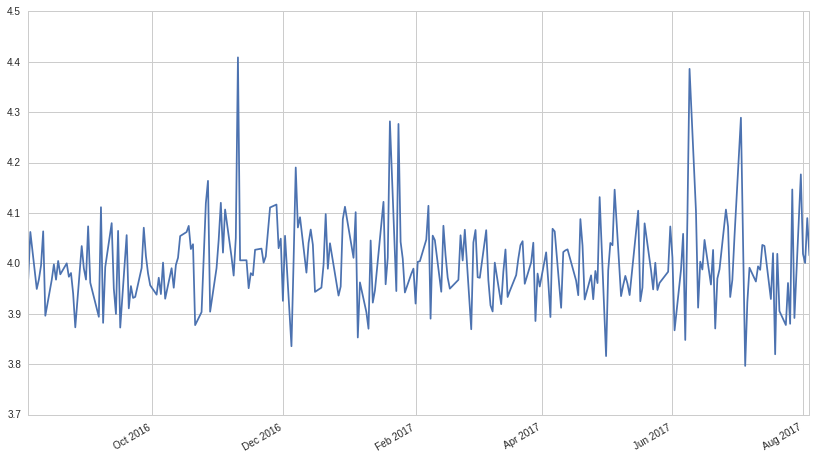

In [7]:
leveraged_back_test.recorded_vars['Leverage'].plot()

### Here is an example of Leveraging where the portfolio would go into to debt twice it's current value
---

In [1]:
def initialize(context):
    
    context.amzn = sid(16841)
    context.ibm = sid(3766)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    schedule_function(record_vars,date_rules.every_day(),time_rules.market_close())
    
def rebalance(context,data):
    order_target_percent(context.amzn,2.0)
    order_target_percent(context.ibm,-2.0)
    
    
def record_vars(context,data):
    record(amzn_close=data.current(context.amzn,'close'))
    record(ibm_close=data.current(context.ibm,'close'))
    record(Leverage = context.account.leverage)
    record(Exposure = context.account.net_leverage)

![](Images/2x_Leverage.png)

### Now let's look at the algorithm but only leverage half it's current value
---

In [2]:
def initialize(context):
    
    context.amzn = sid(16841)
    context.ibm = sid(3766)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    schedule_function(record_vars,date_rules.every_day(),time_rules.market_close())
    
def rebalance(context,data):
    order_target_percent(context.amzn,2.0)
    order_target_percent(context.ibm,-2.0)
    
    
def record_vars(context,data):
    record(amzn_close=data.current(context.amzn,'close'))
    record(ibm_close=data.current(context.ibm,'close'))
    record(Leverage = context.account.leverage)
    record(Exposure = context.account.net_leverage)

![](Images/0.5x_Leverage.png)

**This would indicate that leveraging more would give better returns BUT leveraging is highly risky, in this case the future was known that Amazon was going to go up in value, but leveraging without knowing the details can cause a portfolio not only to lose money but also go into massive debt, to defend against this we could set a *Hard Limit* which would essentially never let our portfolio leverage more than the specified value like below but that in it self is still not enough to out way the risks**

In [ ]:
def initialize(context):
    context.amzn = sid(16841)
    context.ibm = sid(3766)
    
    set_max_leverage(1.03)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    schedule_function(record_vars,date_rules.every_day(),time_rules.market_close())
    
def rebalance(context,data):
    order_target_percent(context.ibm,-0.5)
    order_target_percent(context.amzn,0.5)
    
def record_vars(context,data):
    record(amzn_close=data.current(context.amzn,'close'))
    record(ibm_close=data.current(context.ibm,'close'))
    record(Leverage = context.account.leverage)
    record(Exposure = context.account.net_leverage)